##### Taco VS Raw

1. A[i,j] = B[i,j] * C[j,i]

Experiment 1:
    1. Sparsity is equal in both of them and increase the dimension.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [30]:
def load_csv(filename):
    """
    Loads a CSV file and returns a DataFrame.
    """
    df = pd.read_csv(filename, index_col=False)
    return df

In [69]:
def plot_dimension_vs_time(dataframes, labels, markers=None, linestyles=None,
                           figsize=(16,6), logy=False, max_rows=1000, smooth_window=20):
    """
    Plots Dimension vs Time for multiple kernel DataFrames with:
    - Automatic detection of time column (column containing 'time')
    - Optional smoothing (rolling average)
    - Thin smooth lines without markers
    - Faint raw lines with optional markers
    """
    plt.figure(figsize=figsize)
    
    if markers is None:
        markers = ['o', 's', '^', 'x', 'D'] * len(dataframes)
    if linestyles is None:
        linestyles = ['-','--','-.',':'] * len(dataframes)
    
    for i, df in enumerate(dataframes):
        df_capped = df.iloc[:max_rows].copy()
        
        # Automatically detect time column
        time_cols = [c for c in df_capped.columns if 'time' in c.lower()]
        if not time_cols:
            raise ValueError(f"No column containing 'time' found in DataFrame {i}")
        time_col = time_cols[0]
        
        # Smooth the line using rolling average
        df_capped['Time_smooth'] = df_capped[time_col].rolling(
            window=smooth_window, min_periods=1, center=True
        ).mean()
        
        nnz = df_capped['NNZ_per_row'].iloc[0]
        sparsity = df_capped['Sparsity'].iloc[0]
        
        # Plot raw line (faint, optional markers)
        plt.plot(
            df_capped['Dimension'], 
            df_capped[time_col], 
            marker=markers[i], 
            linestyle=linestyles[i], 
            alpha=0.05,   # very faint
            lw=0.5,
            label=f"{labels[i]} (NNZ/Row%={sparsity})"
        )
        
        # Plot smoothed line (thin, no markers)
        plt.plot(
            df_capped['Dimension'],
            df_capped['Time_smooth'],
            linestyle=linestyles[i],
            lw=0.8,        # thin line
            label=f"{labels[i]} Smoothed"
        )
    
    plt.xlabel("Dimension")
    plt.ylabel("Time (s)")
    plt.title("Dimension vs Time for NNZ/Row = 0.95%")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    if logy:
        plt.yscale('log')
    
    plt.tight_layout()
    plt.show()


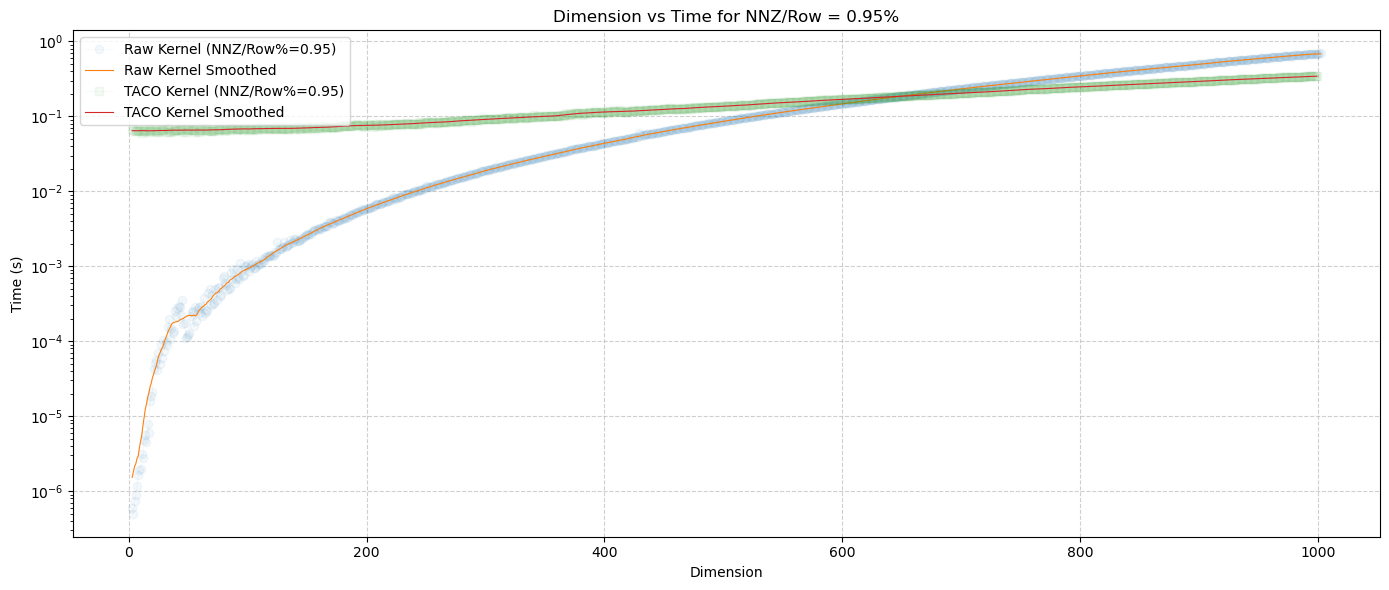

In [70]:
# Load CSV files
raw_df = load_csv("./experiment2/results_raw_0_95.csv")
taco_df = load_csv("./experiment3/results_taco_0_95.csv")

# raw_df.head(10)

# Plot together
plot_dimension_vs_time(
    dataframes=[raw_df, taco_df],
    labels=["Raw Kernel", "TACO Kernel"],
    markers=['o','s'],
    linestyles=['-','-'],
    figsize=(14,6),
    logy=True   # optional: use log scale if times are very small
)